# Multiple Linear Regression

In this notebook we will cover some theoretical and applied questions about multiple linear regression.   

This notebook will cover the content touched on in:
- `Lectures/Supervised Learning/Regression/A First Predictive Modeling Project`,
- `Lectures/Supervised Learning/Regression/Multiple Linear Regression`,
- `Lectures/Supervised Learning/Regression/Categorical Variables and Interactions`,
- `Lectures/Supervised Learning/Regression/Polynomial Regression and Nonlinear Transformations` and
- `Lectures/Supervised Learning/Regression/Linear Regression Diagnostic Plots`.

## Theoretical Questions

##### 1. Gradient Descent

While we have the normal equation as the OLS estimate for $\hat{\beta}$ it is sometimes not ideal to to use that equation to find the estimate. This is because if there are too many features it can be computationally costly to perform the inverse operation.


###### Gradient Descent Idea

One alternative to the normal equation is to perform gradient descent.

Let $\ell(\beta)$ denote a loss function. 

If we remember some Calculus III we can remember that for a particular value of $\beta$, say $\beta^*$, the direction of greatest descent for $\ell$ at $\beta^*$, i.e. how to get to the minimum of $\ell$ most quickly from $\beta^*$, is the opposite direction of the gradient, $-\nabla \ell(\beta^*)$. You can thus approach the value of $\beta$ that minimizes $\ell$ by iteratively updating $\beta$ by moving in $\alpha$ sized steps in the direction of greatest descent.

For linear regression our loss function, $\ell$, is the mean square error, MSE.

Write out an algorithm (in mathematical symbols not code) that leverages the gradient of the loss function to find the optimal $\hat{\beta}$ for multiple linear regression.

##### ANSWER

Recall that for multiple linear regression $\ell(\beta) = \frac{1}{n}(y-X\beta)^T(y-X\beta)$. Thus
$$
\nabla \ell(\beta) = \frac{2}{n}\left(X^TX\beta - X^Ty\right).
$$

Thus we can run an iterative algorithm like so:
Make an initial random guess at $\hat{\beta}$ and call is $\beta^{(0)}$. For each step:
$$
\beta^{(i+1)} = \beta^{(i)} - \alpha \frac{2}{n}\left(X^TX\beta - X^Ty\right),
$$
for some $\alpha \in \mathbb{R}^{+}$ (this is called the learning rate).

Note that as long as our learning rate isn't too large this is guaranteed to converge to the optimal estimate of $\beta$.

## Applied Questions

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

##### 1.  Advertising Model

In this question you will build a predictive model on the `Advertising.csv` data set in the `data` Folder. Start by loading this data then performing a train test split.

In [2]:
ads = pd.read_csv("../../../data/Advertising.csv")

ads.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [3]:
ads_train = ads.sample(frac=.8, random_state=823).copy()
ads_test = ads.drop(ads_train.index).copy()

In [4]:
ads_train.head()

,TV,radio,newspaper,sales
82,75.3,20.3,32.5,11.3
152,197.6,23.3,14.2,16.6
114,78.2,46.8,34.5,14.6
168,215.4,23.6,57.6,17.1
179,165.6,10.0,17.6,12.6


This data set has three features, `TV`, `radio` and `newspaper` that are used to predict `sales`. Each observation in the data set represents an ammount of money spent on TV advertising, radio advertising or newspaper advertising, and then the amount made in sales for that ad buy. Our goal here is to make a multiple linear regression model to predict `sales` using the `TV`, `radio` and `newspaper` columns.

First make scatter plots to explore possible relationships between `sales` and the three features. You may also consider calculating the correlation coefficients.

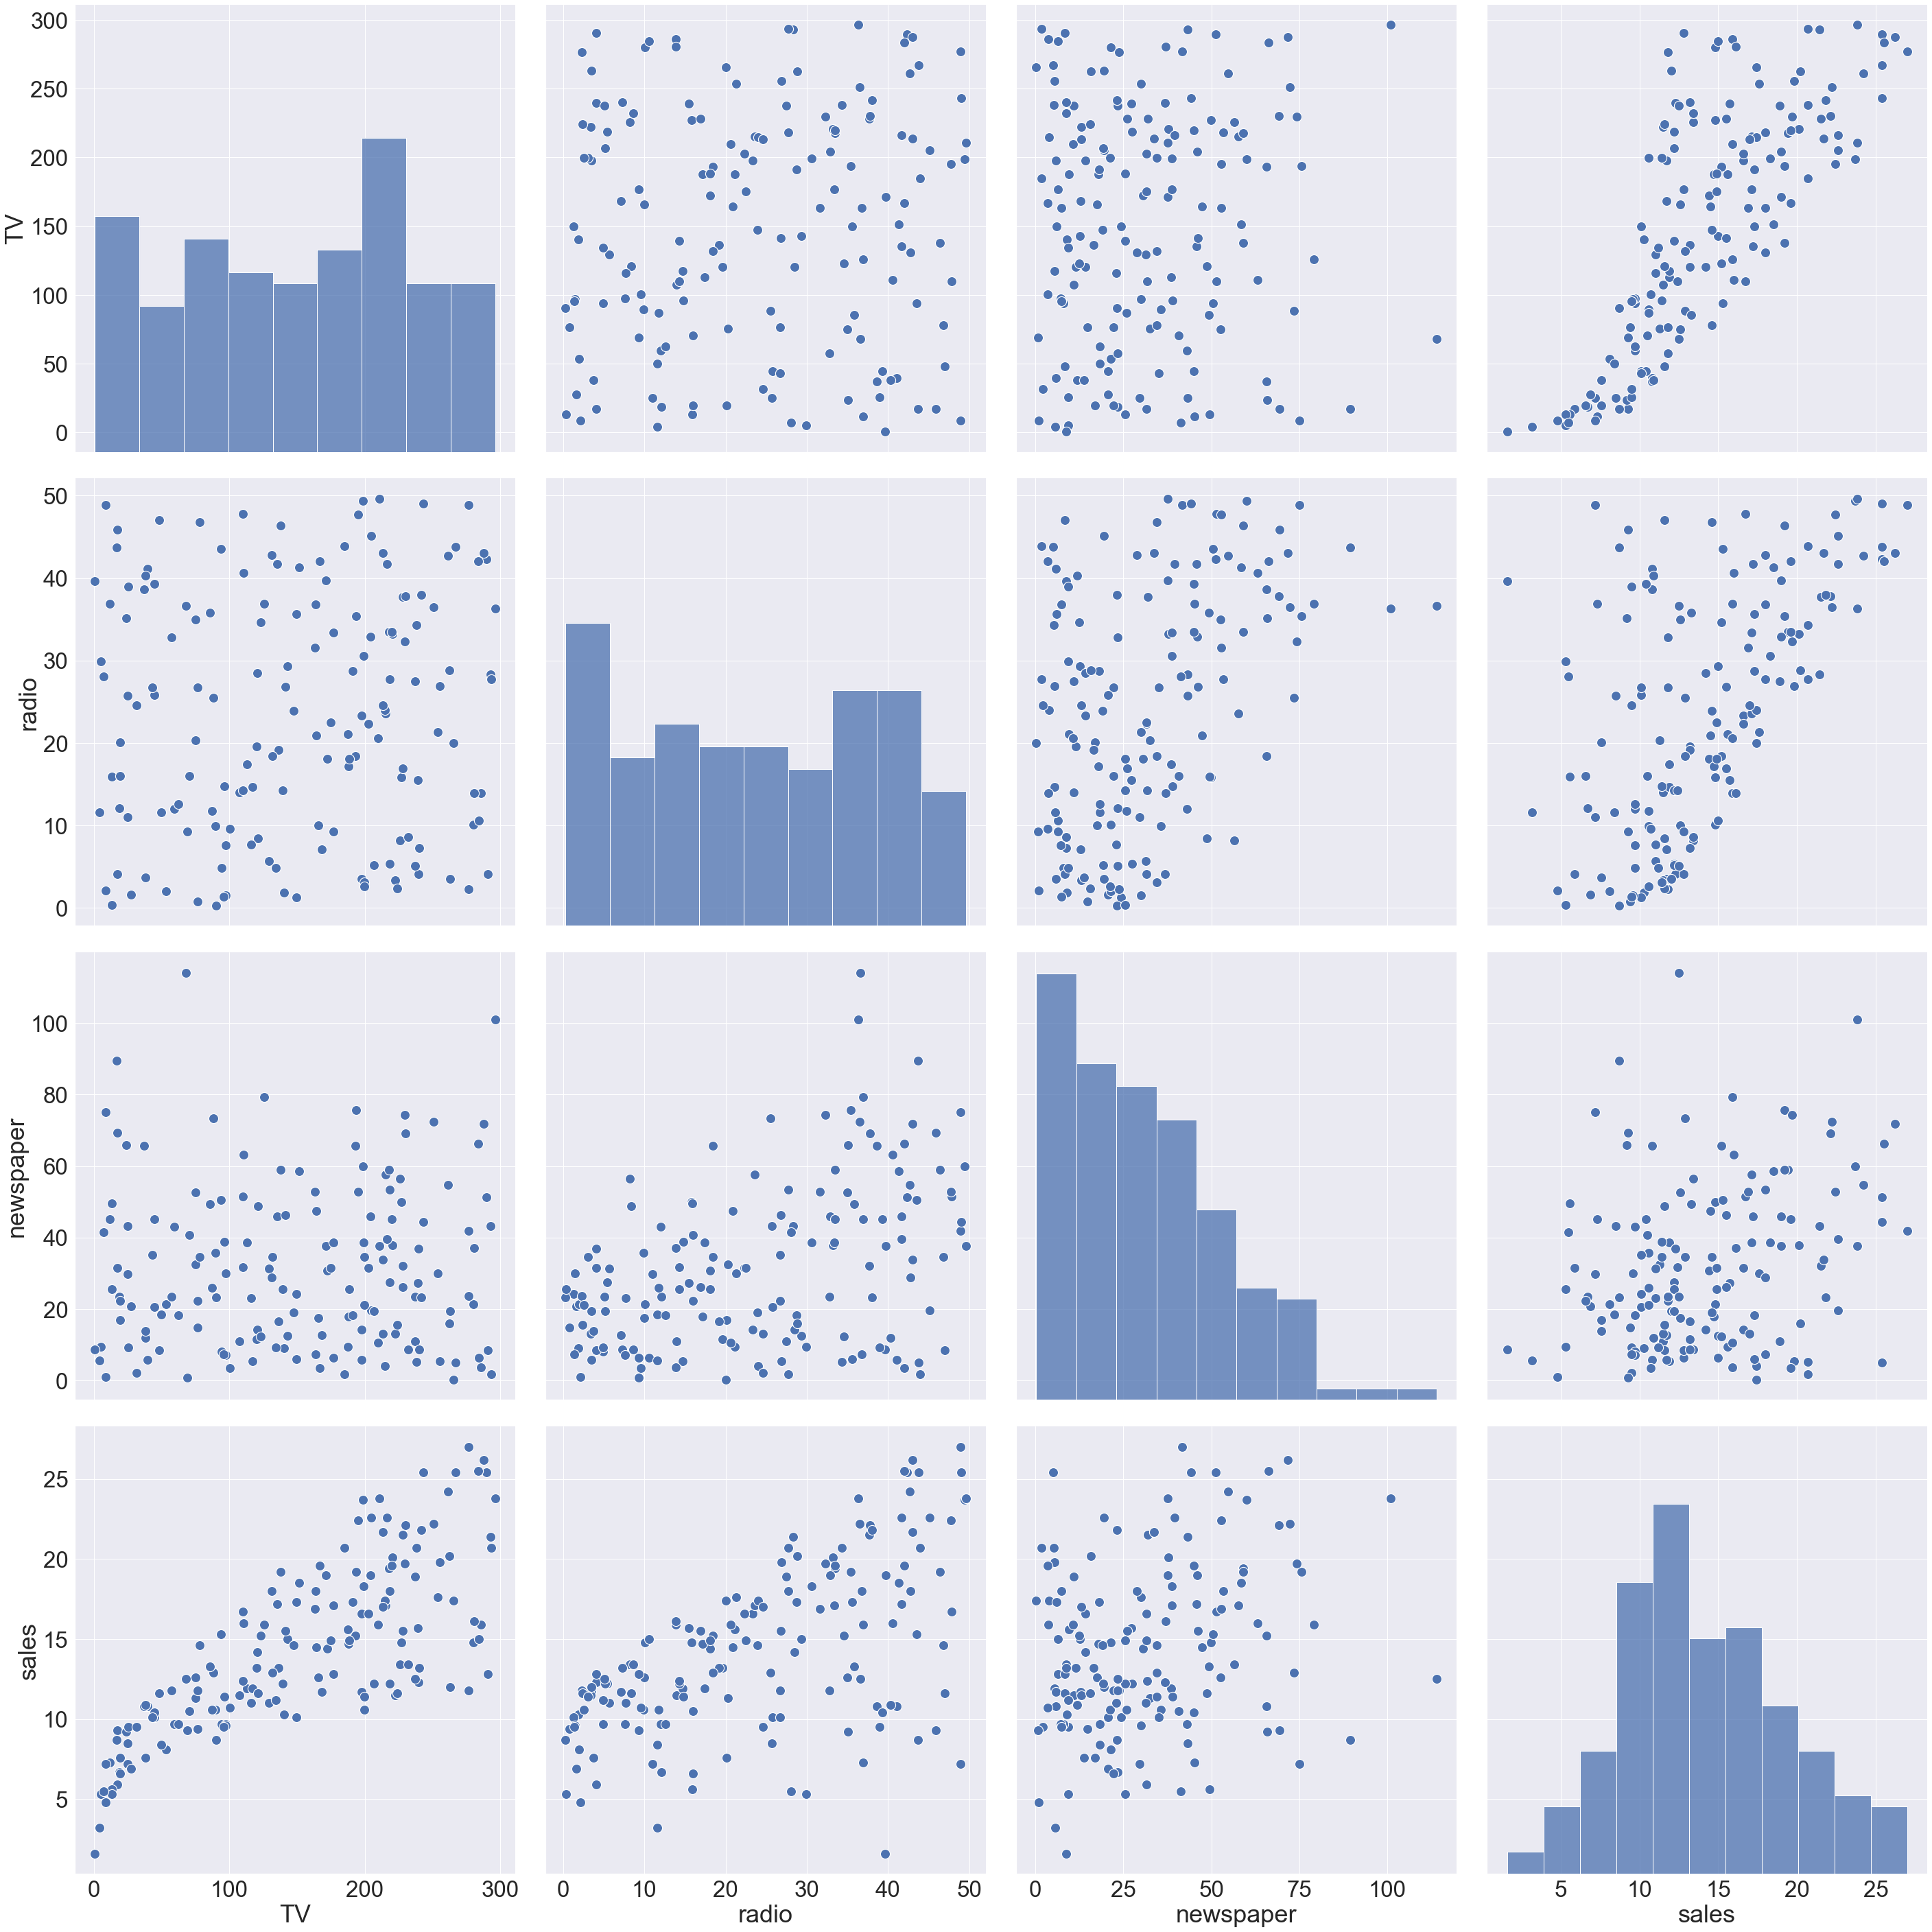

In [5]:
sns.set(font_scale=3)

sns.pairplot(ads_train, height=10, plot_kws={"s": 200, "alpha":1})

plt.tight_layout()

plt.show()

In [6]:
for feature in ['TV', 'radio', 'newspaper']:
    print("Correlation between",feature,"and sales is",
          np.round(np.corrcoef(ads_train[feature],ads_train['sales'])[0,1],3))

Correlation between TV and sales is 0.779
Correlation between radio and sales is 0.58
Correlation between newspaper and sales is 0.259


Start by trying to fit the following model:

$$
\text{sales} = \beta_0 + \beta_1 \text{TV} + \beta_2 \text{radio} + \epsilon,
$$

Once you have fit the model on the training set, plot the errors on the training set, $\hat{y} - y$, against the predicted values, $\hat{y}$. i.e. $\hat{\text{sales}} - \text{sales}$ against $\hat{\text{sales}}$.

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
reg = LinearRegression(copy_X=True)

reg.fit(ads_train[['TV', 'radio']], ads_train['sales'])

errors = reg.predict(ads_train[['TV', 'radio']]) - ads_train['sales']

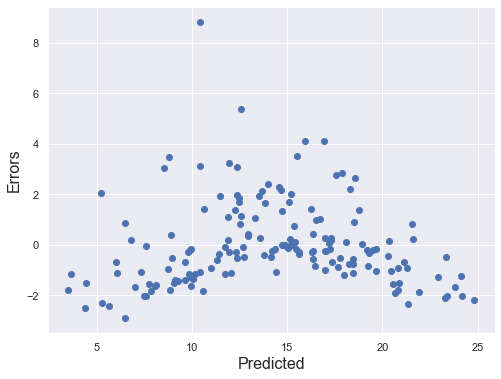

In [9]:
sns.set(font_scale=1)
plt.figure(figsize=(8,6))

plt.scatter(reg.predict(ads_train[['TV', 'radio']]), errors)

plt.xlabel("Predicted", fontsize=16)
plt.ylabel("Errors", fontsize=16)

plt.show()

If you made the residual plot correctly it may look weird! 

There are some reasons for this that we will slowly work through together. Let's start with looking at the `TV` variable.

Take a closer look at the `sales` vs `TV` plot. Does it look like using `TV` as is would be appropriate for predicting `sales`, or should we try some kind of transformation? Try to think of a good nonlinear transformation of `TV` that may better fit these data.

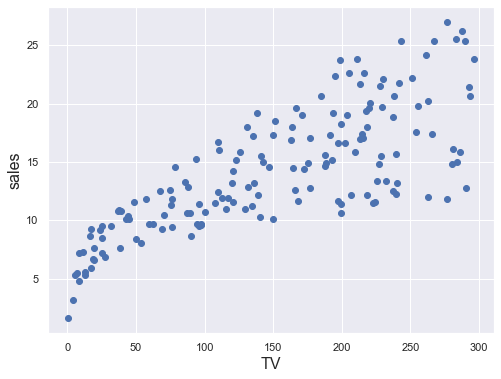

In [10]:
plt.figure(figsize=(8,6))

plt.scatter(ads_train['TV'], ads_train['sales'])

plt.xlabel("TV", fontsize=16)
plt.ylabel("sales", fontsize=16)

plt.show()

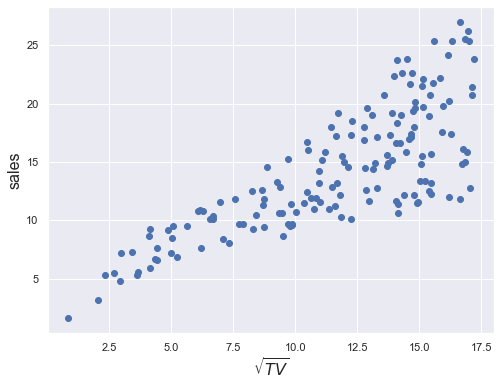

In [11]:
## I personally think sqrt(TV) is a good idea
plt.figure(figsize=(8,6))

plt.scatter(np.sqrt(ads_train['TV']), ads_train['sales'])

plt.xlabel("$\sqrt{TV}$", fontsize=16)
plt.ylabel("sales", fontsize=16)

plt.show()

Now refit the previous model, but replace `TV` with the nonlinear transformation you selected. For example, if you chose $\sqrt{\text{TV}}$ the new model would be:

$$
\text{sales} = \beta_0 + \beta_1 \sqrt{\text{TV}} + \beta_2 \text{radio} + \epsilon
$$

Take another look at your error vs predicted plot, did this help it look less funky?

In [12]:
ads_train['sqrt_TV'] = np.sqrt(ads_train['TV'])

reg = LinearRegression(copy_X=True)

reg.fit(ads_train[['sqrt_TV', 'radio']], ads_train['sales'])

errors = reg.predict(ads_train[['sqrt_TV', 'radio']]) - ads_train['sales']

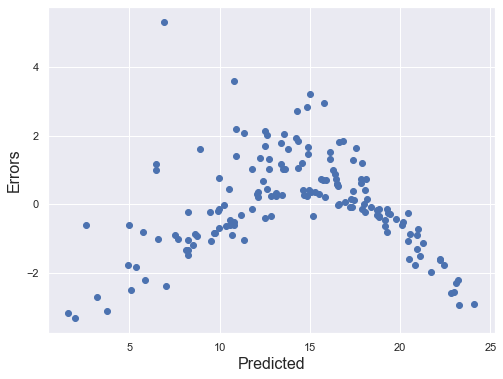

In [13]:
sns.set(font_scale=1)
plt.figure(figsize=(8,6))

plt.scatter(reg.predict(ads_train[['sqrt_TV', 'radio']]), errors)

plt.xlabel("Predicted", fontsize=16)
plt.ylabel("Errors", fontsize=16)


plt.show()

Depending on the nonlinear transformation you chose, this residual plot may look much weirder, but the residuals should be smaller.

If you chose a good nonlinear transformation, then you should see a sort of criss-cross residual pattern, or perhaps almost a hill shape, something like this:

<img src="potential_residuals.png" width="40%"></img>

Patterns like this typically suggest to me that we should try adding an interaction term. Try multiplying `radio` with the nonlinear transformation of `TV` you chose. Then fit a new model including this interaction term, for example if you used $\sqrt{\text{TV}}$ the model would be:

$$
\text{sales} = \beta_0 + \beta_1 \sqrt{\text{TV}} + \beta_2 \text{radio} + \beta_3 \text{radio} \times \sqrt{\text{TV}} + \epsilon.
$$

After you fit the model make the error vs predicted plot one final time.

In [14]:
ads_train['sqrt_TV_radio'] = np.sqrt(ads_train['TV'])*ads_train['radio']

reg = LinearRegression(copy_X=True)

reg.fit(ads_train[['sqrt_TV', 'radio', 'sqrt_TV_radio']], ads_train['sales'])

errors = reg.predict(ads_train[['sqrt_TV', 'radio', 'sqrt_TV_radio']]) - ads_train['sales']

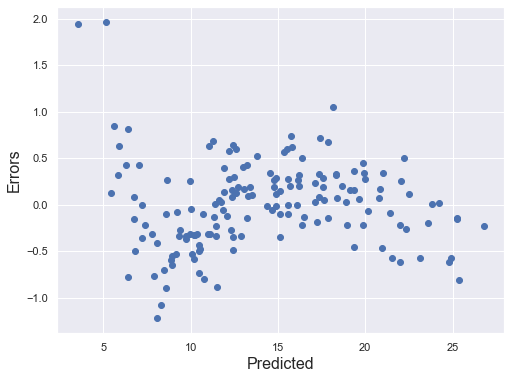

In [15]:
sns.set(font_scale=1)
plt.figure(figsize=(8,6))

plt.scatter(reg.predict(ads_train[['sqrt_TV', 'radio', 'sqrt_TV_radio']]), errors)

plt.xlabel("Predicted", fontsize=16)
plt.ylabel("Errors", fontsize=16)


plt.show()

This error plot should look more "normal", meaning that it falls in a relatively uniform band between the negative and positive version of a number (like $-1$ and $1$ for example). There may be some bowing or a couple outliers, but I believe the method needed to help with this remaining weirdness is outside of what we have learned so far.

We will end this problem with trying to build the "best" predictive model, meaning the model we believe will have the lowest MSE.

Build a selection of models including:
- the three you have looked at up to this point
- a baseline model
- $\text{sales} = \beta_0 + \beta_1 \text{TV} + \beta_2 \text{radio} + \beta_3 \text{newspaper} + \epsilon$, and
- $\text{sales} = \beta_0 + \beta_1 \sqrt{\text{TV}} + \beta_2 \text{radio} + \beta_3 \sqrt{\text{TV}} \times
\text{radio} + \beta_4 \text{newspaper} + \epsilon$.

Use `sklearn`'s `KFold` object, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html">https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html</a>, to perform 5-fold cross-validation to select the model with the lowest average cross-validation MSE.

In [16]:
from sklearn.model_selection import KFold
from sklearn.base import clone

In [17]:
kfold = KFold(n_splits = 5,
                 shuffle=True,
                 random_state=576)

In [18]:
models = ['baseline',
         ['TV', 'radio'],
         ['sqrt_TV', 'radio'],
         ['sqrt_TV', 'radio', 'sqrt_TV_radio'],
         ['TV', 'radio', 'newspaper'],
         ['sqrt_TV', 'radio', 'sqrt_TV_radio', 'newspaper']]

In [19]:
def mse(true, pred):
    return np.sum(np.power(true-pred,2))/len(true)

In [20]:
cv_mses = np.zeros((5, len(models)))

reg = LinearRegression(copy_X = True)

i = 0
for train_index, test_index in kfold.split(ads_train):
    j = 0
    for model in models:
        ads_train_train = ads_train.iloc[train_index]
        ads_train_test = ads_train.iloc[test_index]
        if model == 'baseline':
            train_mean = ads_train_train.sales.mean()
            cv_mses[i,j] = mse(ads_train_test.sales, train_mean*np.ones(len(ads_train_test)))
        else:
            reg_clone = clone(reg)
            reg_clone.fit(ads_train_train[model], ads_train_train.sales)
            cv_mses[i,j] = mse(ads_train_test.sales, reg_clone.predict(ads_train_test[model]))
        j = j + 1
    i = i + 1

In [21]:
np.mean(cv_mses,axis=0)

array([27.34908423,  2.9595253 ,  2.05261535,  0.25773568,  3.06575381,
        0.25855162])

In [22]:
print("The model I tested with lowest avg. cv. mse was the one regressing sales on",
      models[np.argmin(np.mean(cv_mses,axis=0))])
print("with an avg. cv. mse of",
      np.round(np.mean(cv_mses,axis=0)[np.argmin(np.mean(cv_mses,axis=0))],4))

The model I tested with lowest avg. cv. mse was the one regressing sales on ['sqrt_TV', 'radio', 'sqrt_TV_radio']
with an avg. cv. mse of 0.2577


--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)